### Question 2

A two dimensional long rod, square in cross section, has two vertical sides maintained at a temperature of $0°C$. The heat flux entering from the top wall is $10^5 W/m^2$ and the bottom wall is kept insulated. If the length of each side is $0.5m$, determine the temperature distribution in the rod, employing $\Delta x = \Delta y = 0.001m$. Take $k = 41 W/m K$.

In [25]:
# Importing the relevant Python modules
import numpy as np
import matplotlib.pyplot as plt

Taking the heat conduction equation as the Laplace equation:

$$ \frac{d^2T}{dx^2} + \frac{d^2T}{dy^2} = 0$$

In [26]:
# Initializing the variables

x = 0.5                 # x-length of the plate in m
y = 0.5                 # y-length of the plate in m
dx = 0.001 
nx = int(x/dx + 1)      # Total number of divisions in the x-direction
dy = 0.001
ny = int(y/dy + 1)      # Total number of divisions in the y-direction

q = 1E5                 # Heat flux in the top wall in W/m^2
k = 41                  # Thermal conductivity in W/mK

print(nx, ny, q)

501 501 100000.0


In [27]:
# Forming the grid

xarr = np.linspace(0, x, nx)     # 1-D Array of Xs
yarr = np.linspace(0, y, ny)     # 1-D Array of Ys

T = np.zeros((nx, ny))           # 2-D array of temperature in the plate

In [28]:
# Applying the boundary conditions

T[:, 0] = 0        # Vertical side
T[:, -1] = 0       # Vertical side
T[-1, :] = 0       # Insulated bottom

print(T)           # This is the initial temperature distribution in the square plate

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Discretizing the Laplace Equation (Finite Difference Method)

The discretized Laplace equation is: 
$$ \frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{\Delta x^2} + \frac{T_{i, j+1} - 2T_{i, j} + T_{i, j-1}}{\Delta y^2} = 0 $$

This becomes,

$$ T_{i, j} = 0.25(T_{i+1, j} + T_{i-1, j} + T_{i, j+1} + T_{i, j-1}) $$

We also need to introduce the 1-D heat conduction equation for the constant flux coming in from the top wall. The 1-D heat conduction equation is: $$q = -k \frac{dT}{dy} $$

Discretizing this equation using backward difference, we get:

$$T_{j} - T_{j-1} = - \frac{q dy}{k} $$

Therefore,

$$T_{j} = T_{j-1} - \frac{q dy}{k} $$

Note: The change in flux happens in the y-direction in the usual x-y plane as the flux is introduced in the top phase. But in a Python 2-D array, this y-direction is denoted by the various rows. In a Python 2-D array, the rows are denoted by x. Therefore, a change in the flux in the y-direction in the Cartesian plane is the same as the change in the x-direction in a Python 2-D array.

In [30]:
def T_dist(T, nt, err):
    """
    T_dist is the function that calculates the temperature distribution in the plate by applying the conditions given. 
    It is solved using the explicit method.
    
    Here, T is the initial temperature distribution of the plate.
    nt is the maximum number of iterations.
    err is the maximum permissible error. 
    
    This function iterates according to the discretization of the Laplace equation and the heat conduction across the top wall.
    It returns the final temperature distribution of the plate once it satisfies the convergence criterion.
    
    """
    for t in range(1, nt+1):           # t is a single iteration of the maximum number of iterations i.e. nt iterations
        Tn = T.copy()             # A copy of the previous iteration is made to check for the error

        T[1:-1, 1:-1] = 0.25*(T[2:, 1:-1] + T[0:-2, 1:-1] + T[1:-1, 2:] + T[1:-1, 0:-2])
                 
        for i in range(1, ny):
            T[nx-1, i] = T[nx-2, i] - dy*q/k     # Applying the heat conduction equation across the rows
        T[0, :] = 0                              # The condition for the insulated bottom

        
        if t%100000 == 0:                 # The temperature distribution is printed every 1,00,000 iterations to check
            print(T)
        
        # Here, the error is calculated by finding the difference between the current iteration and the previous iteration 
        # and ensuring that the difference of all the nodes in the 2-D array are less than the max permissible error.
        
        if (abs(T - Tn) < err).all():             
            print("Iteration number: ", t)       # If the condition is satisfied, the number of iterations taken is printed
            print("The temperature distribution: ", T)  # The final temperature distribution is printed
            return T
        
    return T

In [31]:
# The calculation is carried out with the initial array T, a max iterations of 5,00,000 and an error of 10^-5
T_final = T_dist(T, 500000, 1E-5)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.70847594e-04 -9.41675605e-04 ... -9.41675605e-04
  -4.70847594e-04  0.00000000e+00]
 [ 0.00000000e+00 -9.41757559e-04 -1.88347595e-03 ... -1.88347595e-03
  -9.41757559e-04  0.00000000e+00]
 ...
 [ 0.00000000e+00 -7.74671759e+00 -1.50113648e+01 ... -1.50113648e+01
  -7.74671759e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.96621324e+00 -1.67129237e+01 ... -1.67129237e+01
  -8.96621324e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.14052376e+01 -1.91519481e+01 ... -1.91519481e+01
  -1.14052376e+01 -2.43902439e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.27939693e-03 -2.55874234e-03 ... -2.55874234e-03
  -1.27939693e-03  0.00000000e+00]
 [ 0.00000000e+00 -2.55886500e-03 -5.11762696e-03 ... -5.11762696e-03
  -2.55886500e-03  0.00000000e+00]
 ...
 [ 0.00000000e+00 -8.09700603e+00 -1.5711927

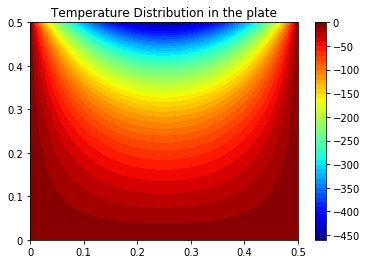

<Figure size 432x288 with 0 Axes>

In [32]:
# The function is now plotted. The plot displays the contours of the temperature distribution.

# The parameters of the contour plot are initialized
colorinterpolation = 50
colourMap = plt.cm.jet

# Setting the meshgrid
X, Y = np.meshgrid(np.arange(0, nx), np.arange(0, ny))

#Plotting the contour
fig, ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, T_final, colorinterpolation, cmap=colourMap)
fig.colorbar(cp)

# Adding formatting to the plot
ax.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5])
ax.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5])
ax.set_title("Temperature Distribution in the plate")
plt.show()

#Saving the plot
plt.savefig("contourplot.jpg")

### The Conclusion

The contour plot shows that the temperature across the vertical sides and the insulated bottom is zero, as expected. The flux across the top phase results in the temperature distribution as indicated in the plot. The temperatures are negative because, as the heat conduction equation has a negative sign, it means that the **heat is flowing out of the top boundary**.

It took 4,65,035 iterations for the answer to converge, which is extremely high. Certain changes can be made to make this calculation less computationally expensive. This is discussed in the next question.